<h1>Name : Pratyush Balivada</h1>

<h3> Task 1 - Prediction using Supervised ML</h3>

<h3> Task Description : </h3>

<h5> Predict the percentage of a student based on number of study hours. This is a simple linear regression task as it involves only 2 variables. </h5>

<h3>Importing the  necessary libraries and packages</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = "http://bit.ly/w-data"
df = pd.read_csv(dataset)
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h2>Visualizing the data ,correlation and covariance using various plots</h2>

Text(0, 0.5, 'Student percentage score')

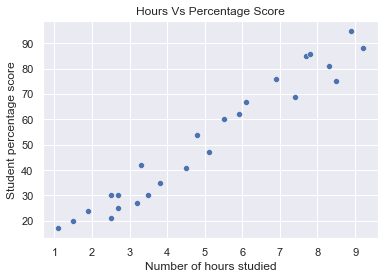

In [11]:
sns.set()
x=sns.scatterplot(x="Hours",y="Scores",data=df)
x.set(title="Hours Vs Percentage Score")
x.set_xlabel('Number of hours studied')
x.set_ylabel('Student percentage score')

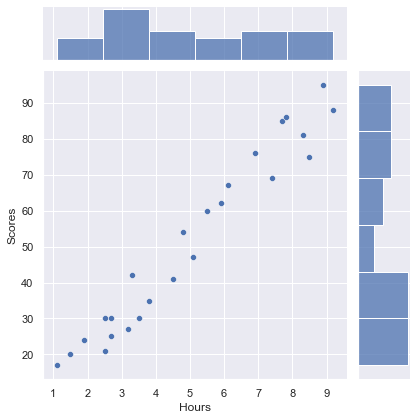

In [12]:
sns.jointplot(x="Hours",y="Scores",data=df)

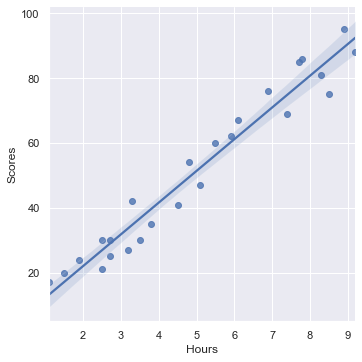

In [13]:
sns.lmplot(x="Hours",y="Scores",data=df)

<AxesSubplot:>

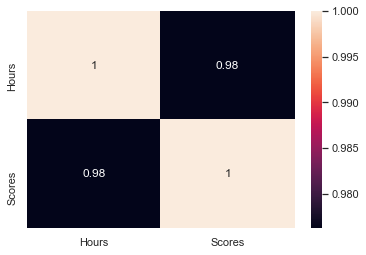

In [14]:
correl = df.corr()
sns.heatmap(correl,annot=True)

<AxesSubplot:>

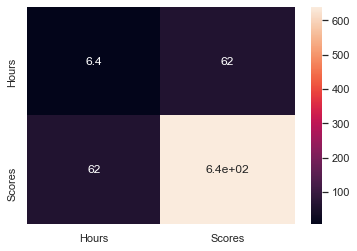

In [15]:
covariance= df.cov()
sns.heatmap(covariance,annot=True)

In [16]:
from scipy import stats
slope , intercept , r_value,p_value,std_err =stats.linregress(df['Hours'],df['Scores'])

<h2>Data preparation</h2>

In [17]:
a= df.iloc[:,:-1].values
b= df.iloc[:,1].values
print(a)
print(b)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


<h2>Training and Testing the model</h2>

In [13]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2,random_state=0)

In [14]:
print(a_train)
print(a_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
print(b_train)
print(b_test)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


In [16]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(a_train,b_train)


LinearRegression()

<h2>Analyzing the actual and predicted values</h2>

In [17]:
pred= regress.predict(a_test)
print("THE PREDICTED VALUES :",pred)

THE PREDICTED VALUES : [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
compare = pd.DataFrame({"Actual val": b_test,"Predicted values": pred})
compare

,Actual val,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<h2>Visualizing the actual and predicted values</h2>

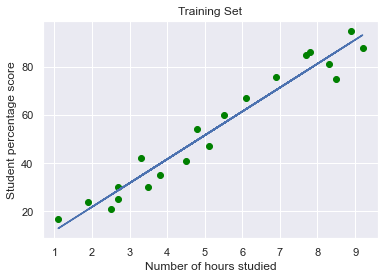

In [19]:
plt.scatter(a_train,b_train,color= 'green')
plt.plot(a_train,regress.predict(a_train))
plt.xlabel('Number of hours studied')
plt.ylabel('Student percentage score')
plt.title('Training Set')
plt.show()

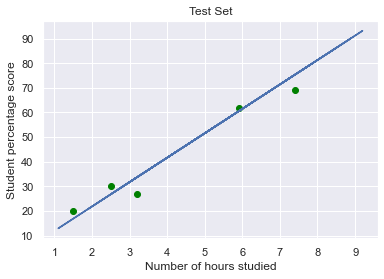

In [20]:
plt.scatter(a_test,b_test,color= 'green')
plt.plot(a_train,regress.predict(a_train))
plt.xlabel('Number of hours studied')
plt.ylabel('Student percentage score')
plt.title('Test Set')
plt.show()

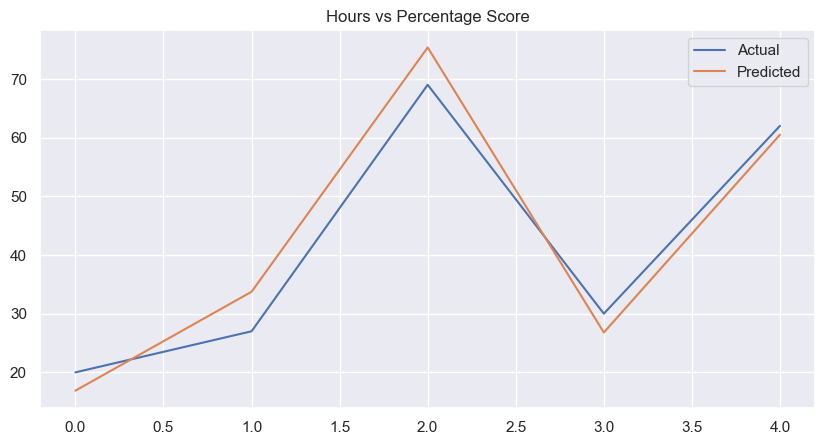

In [49]:
plt.figure(figsize=(10, 5), dpi=100)
range_len= range(len(b_test))
plt.plot(range_len, b_test, label="Actual")
plt.plot(range_len, pred, label="Predicted")
plt.title("Hours vs Percentage Score")
plt.legend()
plt.show()

<h2>Making Predictions </h2>

In [38]:
#Let us test the model with hours = 9.25 to predict the percentage score of the student
hours = 9.25
own_pred = regress.predict([[hours]])
print(f"No of hours = {hours}")
print(f"Percentage score of student = {own_pred[0]}")

No of hours = 9.25
Percentage score of student = 93.69173248737538


<h2> Evaluating model using metrics</h2>

In [41]:
print("Slope intercept equation--> (Percentage) =",slope,"*(Hours) +",intercept)

Slope intercept equation--> (Percentage) = 9.775803390787473 *(Hours) + 2.4836734053731817


In [42]:
from sklearn.metrics import r2_score
print("R-Squared score = ",r2_score(b_test,pred))

R-Squared score =  0.9454906892105356


In [43]:
from sklearn.metrics import mean_squared_error
print("Mean squared error = ",mean_squared_error(b_test,pred))

Mean squared error =  21.5987693072174


In [46]:
from sklearn.metrics import mean_squared_error
print("Root Mean squared error = ",mean_squared_error(b_test,pred,squared=False))

Root Mean squared error =  4.6474476121003665


In [48]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error = ",mean_absolute_error(b_test,pred))

Mean Absolute error =  4.183859899002975


<h6>With this experiment we have predicted the percentage score of a student based on the no of study hours. We have performed linear regression on the 2 variables, trained the model to improve the predictability and accuracy, visualized the comparisons between actual and predicted values and finally evaluated the model with various metrics.</h6>